In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [49]:
device = torch.device('mps') if torch.backends.mps.is_available() else torch.device('cpu') 

In [50]:
class FeedForward(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(392, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 1)
        
    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [51]:
model = FeedForward()

In [52]:
from dataloading import load_data

In [53]:
trainloader, testloader = load_data()

In [54]:
learning_rate = .001

criterion = nn.BCEWithLogitsLoss()
# optimizer = optim.SGD(baseline.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [55]:
epochs = 5

In [56]:
losses = []

for epoch in range(epochs):
    running_loss = 0.0
    epoch_losses = []
    
    for i, data in enumerate(trainloader, 0):
        inputs, target, classes = data
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        outputs = outputs.squeeze()
        
        loss = criterion(outputs, target.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        epoch_losses.append(loss.item())
    
    epoch_loss = torch.mean(torch.tensor(epoch_losses))
    print(f'epoch: {epoch}, loss: {epoch_loss}')
    losses.append(epoch_loss)  

epoch: 0, loss: 1.0187866687774658
epoch: 1, loss: 0.3592219352722168
epoch: 2, loss: 0.2453088015317917
epoch: 3, loss: 0.1378244012594223
epoch: 4, loss: 0.08630413562059402


In [57]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        inputs, targets, classes = data
        
        outputs = model(inputs)
        
        predictions = torch.round(torch.sigmoid(outputs))
                
        correct += (predictions.squeeze() == targets.squeeze()).sum()
        total += predictions.size(0)

                
acc = correct / total
print(f'Accuracy: {acc}')

Accuracy: 0.8059999942779541


In [58]:
from evaluate import evaluate_model

l = []
a = []

epochs = 30

for round in range(20):
    print('####################################################')
    print(f'Round: {round}')
    print('####################################################')
    
    model = FeedForward()
    
    trainloader, testloader = load_data()
    
    learning_rate = .001

    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    losses = []
    accs = []

    for epoch in range(epochs):
        running_loss = 0.0
        epoch_losses = []

        for i, data in enumerate(trainloader, 0):
            inputs, target, classes = data

            optimizer.zero_grad()

            outputs = model(inputs)
            outputs = outputs.squeeze()

            loss = criterion(outputs, target.float())
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            epoch_losses.append(loss.item())

        epoch_loss = torch.mean(torch.tensor(epoch_losses))
        print(f'epoch: {epoch}, loss: {epoch_loss}')
        losses.append(epoch_loss) 
        
        acc = evaluate_model(model, testloader)
        accs.append(acc)
    
    l.append(losses)
    a.append(accs)

epoch: 0, loss: 1.3534226417541504
Accuracy: 0.6299999952316284
epoch: 1, loss: 0.48433566093444824
Accuracy: 0.7400000095367432
epoch: 2, loss: 0.25675150752067566
Accuracy: 0.7620000243186951
epoch: 3, loss: 0.1926586627960205
Accuracy: 0.7620000243186951
epoch: 4, loss: 0.11016294360160828
Accuracy: 0.781000018119812
epoch: 5, loss: 0.07963909208774567
Accuracy: 0.7870000004768372
epoch: 6, loss: 0.04747015982866287
Accuracy: 0.7760000228881836
epoch: 7, loss: 0.029974134638905525
Accuracy: 0.7950000166893005
epoch: 8, loss: 0.017175326123833656
Accuracy: 0.7979999780654907
epoch: 9, loss: 0.010836835950613022
Accuracy: 0.796999990940094
epoch: 10, loss: 0.007968060672283173
Accuracy: 0.8059999942779541
epoch: 11, loss: 0.0056154378689825535
Accuracy: 0.8069999814033508
epoch: 12, loss: 0.004703831858932972
Accuracy: 0.8080000281333923
epoch: 13, loss: 0.003829346736893058
Accuracy: 0.8100000023841858
epoch: 14, loss: 0.0031922946218401194
Accuracy: 0.8069999814033508
epoch: 15, los

epoch: 3, loss: 0.13137193024158478
Accuracy: 0.7730000019073486
epoch: 4, loss: 0.08571762591600418
Accuracy: 0.7590000033378601
epoch: 5, loss: 0.06031198054552078
Accuracy: 0.7870000004768372
epoch: 6, loss: 0.03465753793716431
Accuracy: 0.7620000243186951
epoch: 7, loss: 0.01953795924782753
Accuracy: 0.7879999876022339
epoch: 8, loss: 0.010014090687036514
Accuracy: 0.7900000214576721
epoch: 9, loss: 0.006495287641882896
Accuracy: 0.7950000166893005
epoch: 10, loss: 0.004680924117565155
Accuracy: 0.796999990940094
epoch: 11, loss: 0.003940541762858629
Accuracy: 0.796999990940094
epoch: 12, loss: 0.002954107476398349
Accuracy: 0.7990000247955322
epoch: 13, loss: 0.0024281651712954044
Accuracy: 0.8009999990463257
epoch: 14, loss: 0.0020432346500456333
Accuracy: 0.8019999861717224
epoch: 15, loss: 0.0017323987558484077
Accuracy: 0.8009999990463257
epoch: 16, loss: 0.0014324509538710117
Accuracy: 0.8019999861717224
epoch: 17, loss: 0.0012011347571387887
Accuracy: 0.8019999861717224
epoc

epoch: 6, loss: 0.04045424610376358
Accuracy: 0.7940000295639038
epoch: 7, loss: 0.0266738124191761
Accuracy: 0.7870000004768372
epoch: 8, loss: 0.014755127020180225
Accuracy: 0.8040000200271606
epoch: 9, loss: 0.010759713128209114
Accuracy: 0.8029999732971191
epoch: 10, loss: 0.004760365933179855
Accuracy: 0.8069999814033508
epoch: 11, loss: 0.0031380667351186275
Accuracy: 0.8119999766349792
epoch: 12, loss: 0.00226908759213984
Accuracy: 0.8080000281333923
epoch: 13, loss: 0.0017391352448612452
Accuracy: 0.8080000281333923
epoch: 14, loss: 0.0014110086485743523
Accuracy: 0.8069999814033508
epoch: 15, loss: 0.001167938462458551
Accuracy: 0.8040000200271606
epoch: 16, loss: 0.0010046447860077024
Accuracy: 0.8029999732971191
epoch: 17, loss: 0.0008802350494079292
Accuracy: 0.8069999814033508
epoch: 18, loss: 0.0007364178891293705
Accuracy: 0.8050000071525574
epoch: 19, loss: 0.0006429394707083702
Accuracy: 0.8040000200271606
epoch: 20, loss: 0.000584829889703542
Accuracy: 0.8009999990463

epoch: 9, loss: 0.0057096658274531364
Accuracy: 0.7839999794960022
epoch: 10, loss: 0.004563965834677219
Accuracy: 0.7860000133514404
epoch: 11, loss: 0.0035378087777644396
Accuracy: 0.7900000214576721
epoch: 12, loss: 0.0027808789163827896
Accuracy: 0.7850000262260437
epoch: 13, loss: 0.0024321330711245537
Accuracy: 0.7919999957084656
epoch: 14, loss: 0.002040983410552144
Accuracy: 0.7919999957084656
epoch: 15, loss: 0.0017619985155761242
Accuracy: 0.7910000085830688
epoch: 16, loss: 0.0015727857826277614
Accuracy: 0.7940000295639038
epoch: 17, loss: 0.0013694564113393426
Accuracy: 0.7950000166893005
epoch: 18, loss: 0.0011793137528002262
Accuracy: 0.7919999957084656
epoch: 19, loss: 0.0011021526297554374
Accuracy: 0.7950000166893005
epoch: 20, loss: 0.0009541153558529913
Accuracy: 0.7919999957084656
epoch: 21, loss: 0.0008611055091023445
Accuracy: 0.7929999828338623
epoch: 22, loss: 0.0007816174766048789
Accuracy: 0.7940000295639038
epoch: 23, loss: 0.0007308369386009872
Accuracy: 0.

epoch: 12, loss: 0.0038787578232586384
Accuracy: 0.7960000038146973
epoch: 13, loss: 0.003311562817543745
Accuracy: 0.7940000295639038
epoch: 14, loss: 0.002648583147674799
Accuracy: 0.8009999990463257
epoch: 15, loss: 0.0022705814335495234
Accuracy: 0.796999990940094
epoch: 16, loss: 0.0019219908863306046
Accuracy: 0.796999990940094
epoch: 17, loss: 0.0017538911197334528
Accuracy: 0.7990000247955322
epoch: 18, loss: 0.0014718014281243086
Accuracy: 0.800000011920929
epoch: 19, loss: 0.0013024552026763558
Accuracy: 0.7979999780654907
epoch: 20, loss: 0.001131331897340715
Accuracy: 0.7990000247955322
epoch: 21, loss: 0.001038702903315425
Accuracy: 0.8009999990463257
epoch: 22, loss: 0.0009201595676131546
Accuracy: 0.796999990940094
epoch: 23, loss: 0.0008366408874280751
Accuracy: 0.7990000247955322
epoch: 24, loss: 0.00077239447273314
Accuracy: 0.7990000247955322
epoch: 25, loss: 0.0006993405986577272
Accuracy: 0.796999990940094
epoch: 26, loss: 0.0006439301068894565
Accuracy: 0.79600000

In [83]:
aa = torch.tensor(a)

max_a, _ = torch.max(aa, dim=-1)

i = torch.argmax(max_a)

maxmax_a = torch.max(max_a)
min_a = torch.min(max_a)
std_a = torch.std(max_a)

print(min_a, maxmax_a, std_a)

tensor(0.7910) tensor(0.8270) tensor(0.0089)


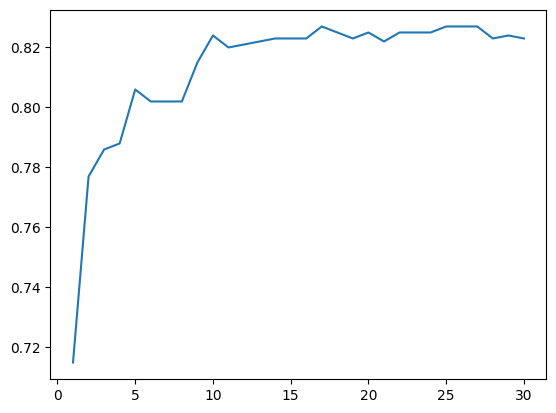

In [84]:
import matplotlib.pyplot as plt

x = range(1, 31)
y = a[i]

plt.plot(x, y)
plt.show()

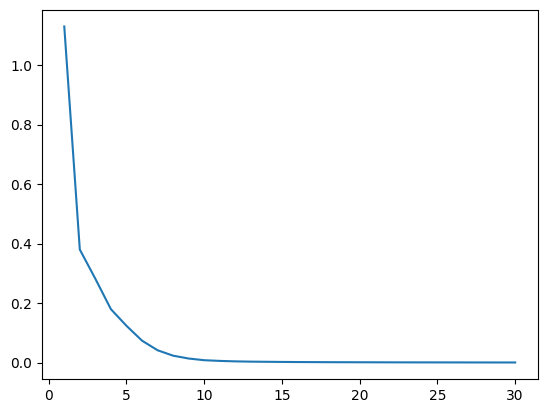

In [85]:
import matplotlib.pyplot as plt

x = range(1, 31)
y = l[i]

plt.plot(x, y)
plt.show()

In [78]:
print(torch.tensor(a[i]).tolist())
print(torch.tensor(l[i]).tolist())

[0.6299999952316284, 0.7400000095367432, 0.7620000243186951, 0.7620000243186951, 0.781000018119812, 0.7870000004768372, 0.7760000228881836, 0.7950000166893005, 0.7979999780654907, 0.796999990940094, 0.8059999942779541, 0.8069999814033508, 0.8080000281333923, 0.8100000023841858, 0.8069999814033508, 0.8119999766349792, 0.8100000023841858, 0.8100000023841858, 0.8080000281333923, 0.8090000152587891, 0.8090000152587891, 0.8080000281333923, 0.8080000281333923, 0.8080000281333923, 0.8080000281333923, 0.8080000281333923, 0.8080000281333923, 0.8090000152587891, 0.8059999942779541, 0.8080000281333923]
[1.3534226417541504, 0.48433566093444824, 0.25675150752067566, 0.1926586627960205, 0.11016294360160828, 0.07963909208774567, 0.04747015982866287, 0.029974134638905525, 0.017175326123833656, 0.010836835950613022, 0.007968060672283173, 0.0056154378689825535, 0.004703831858932972, 0.003829346736893058, 0.0031922946218401194, 0.00269003352150321, 0.002289604162797332, 0.0019983206875622272, 0.001756172